# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [7]:
df.corr()

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


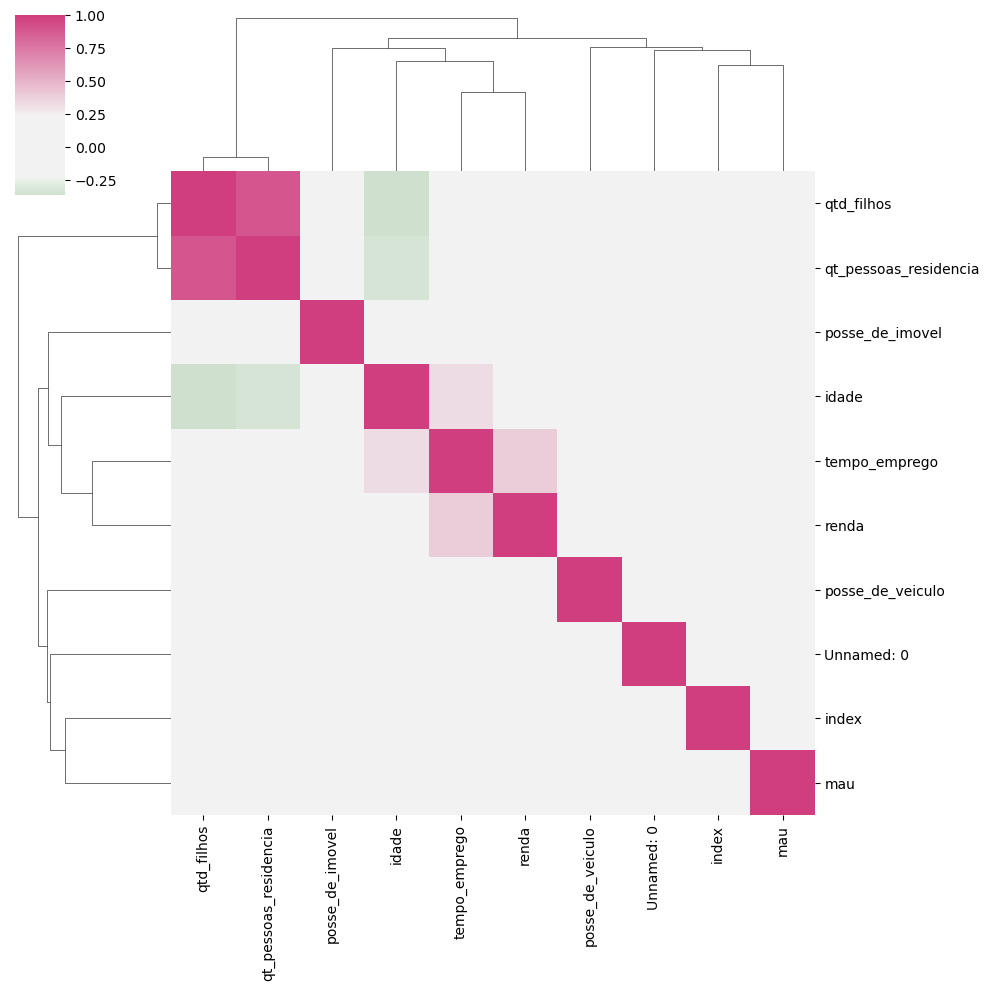

In [12]:
cmap = sns.diverging_palette(h_neg=125
                             , h_pos=350
                             , as_cmap=True
                             , sep = 60
                             , center = 'light')

sns.clustermap(df.corr(), figsize=(10, 10), center = 0, cmap=cmap)

Observação: 

A correlação entre idade e filho é negativa assim como a idade e pessoas na casa. 
Tempo de empreso tem correlação positiva com renda e idade. 
existe pouco correlação linear das outras variáveis.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Tempo de emprego e idade:

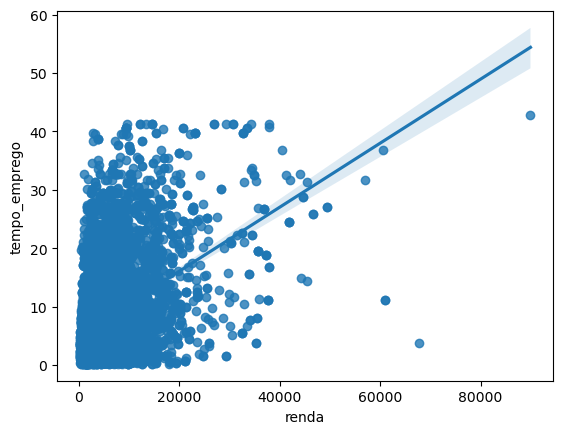

In [14]:
_ = sns.regplot(y='tempo_emprego', x='renda', data = df)

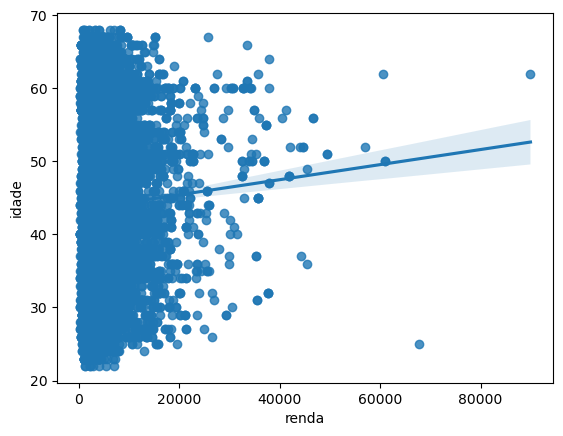

In [15]:
_ = sns.regplot(y='idade', x='renda', data = df)

3) Na su aopinião, há outliers na variável renda?

Existem outllier, porém eles não podem ser desconsiderados devido a natureza da variável ( é possível que ocorra)

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [16]:
df['renda_log'] = np.log(df['renda'])

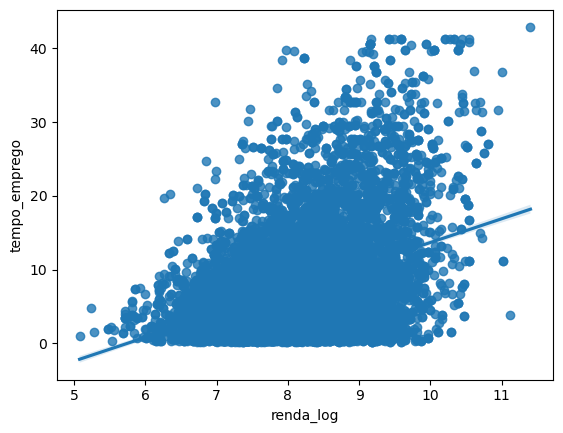

In [17]:
_ = sns.regplot(y='tempo_emprego', x='renda_log', data = df)

In [22]:
df['renda_log'] = np.log(df['renda'])

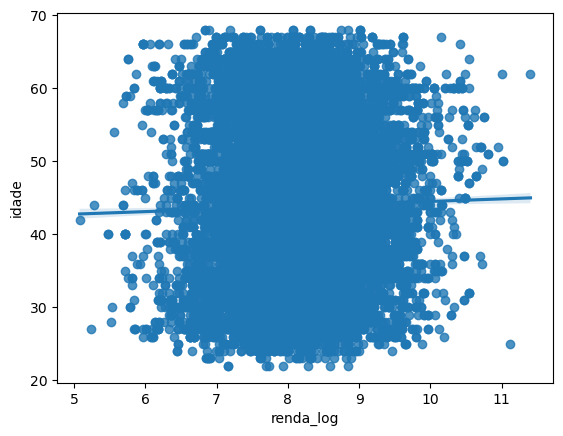

In [24]:
_ = sns.regplot(y='idade', x='renda_log', data = df)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Depende, para o grafico de tempo de emprego ajudou um pouco, mas a dispersão aidna é grande, mas para o grafico de renda por idade, não ajudou.